# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

# Import libraries

In [203]:
import pandas as pd
from matplotlib import pyplot as plt

In [1]:
# Cambios para prueba

In [204]:
df_flights = pd.read_csv('data/flights.csv')
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Data Cleaning

## Null values

In [205]:
# Null values
df_flights_null = df_flights.isnull().sum()
df_flights_null

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [206]:
# Slice of dataframe where "DepDel15" has null values
df_flights[df_flights['DepDel15'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


In [207]:
# Grouping null values in "DepDel15" by "DepDelay"
df_flights[df_flights['DepDel15'].isnull()].groupby('DepDelay').size()

DepDelay
0    2761
dtype: int64

In [208]:
# Grouping values on "DepDelay" by "DepDel15"
df_flights.groupby('DepDel15')[['DepDelay']].count()

,DepDelay
DepDel15,
0.0,215038
1.0,54141


In [209]:
# Grouping dataframe where "DepDel15" = 0 by DepDelay
df_flights[df_flights['DepDel15'] == 0].groupby('DepDelay').size()

DepDelay
-63        1
-52        1
-35        1
-27        1
-24        4
-23        3
-22        3
-21       12
-20       26
-19       33
-18       51
-17       91
-16      156
-15      275
-14      400
-13      697
-12     1123
-11     1717
-10     3818
-9      4969
-8      7168
-7     10478
-6     13785
-5     18495
-4     19430
-3     20322
-2     19754
-1     18073
 0     16521
 1      8724
 2      6727
 3      5695
 4      4925
 5      4511
 6      4130
 7      3649
 8      3380
 9      3075
 10     2983
 11     2667
 12     2551
 13     2380
 14     2233
dtype: int64

Every record that has a null value on "DepDel15" has a zero value on "DepDelay", which means that there was no delay on departure. The null values are probably just a mistake.

In [210]:
# Replace null values with 0 on "DepDel15"
df_flights['DepDel15'] = df_flights['DepDel15'].fillna(0)
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


In [211]:
# Verifying replacement of null values
df_flights[df_flights['DepDel15'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled


## Outliers

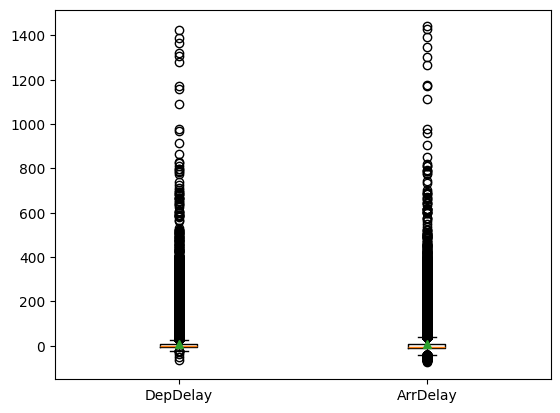

In [212]:
# Visualizing outliers on "DepDelay" and "ArrDelay"
plt.boxplot(
    x = df_flights[
        ['DepDelay', 'ArrDelay']
    ],
    showmeans = True
)
plt.xticks(
    [1, 2],
    labels = ['DepDelay', 'ArrDelay']
)
plt.show()

In [213]:
# Statistics for "DepDelay"
df_flights['DepDelay'].describe()

count    271940.000000
mean         10.350449
std          35.673710
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

In [214]:
# Statistics for "DepDelay"
df_flights['ArrDelay'].describe()

count    271940.000000
mean          6.496650
std          38.230331
min         -75.000000
25%         -11.000000
50%          -3.000000
75%          10.000000
max        1440.000000
Name: ArrDelay, dtype: float64

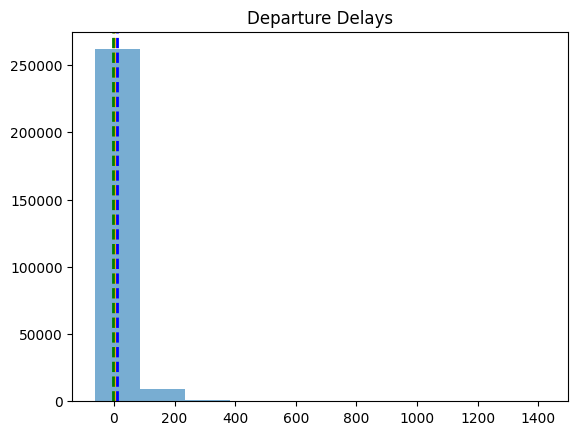

In [215]:
# Histogram for "DepDelay"
plt.hist(
    df_flights['DepDelay'],
    alpha = 0.6
)
# Mean
plt.axvline(
    df_flights['DepDelay'].mean(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)
# Median
plt.axvline(
    df_flights['DepDelay'].median(),
    color = 'orange',
    linestyle = 'dashed',
    linewidth = 2
)
# Mode
plt.axvline(
    df_flights['DepDelay'].mode()[0],
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)
plt.title('Departure Delays')
plt.show()

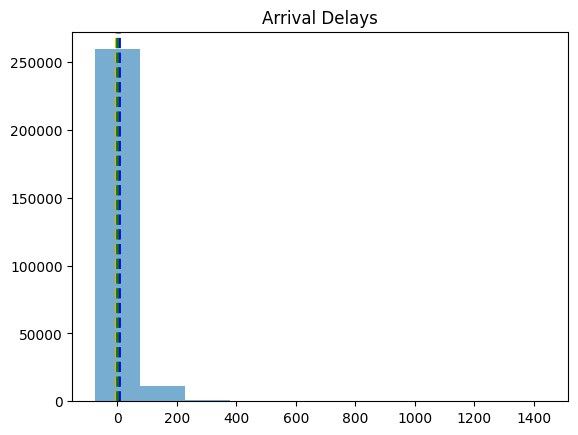

In [216]:
# Histogram for "ArrDelay"
plt.hist(
    df_flights['ArrDelay'],
    alpha = 0.6
)
# Mean
plt.axvline(
    df_flights['ArrDelay'].mean(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)
# Median
plt.axvline(
    df_flights['ArrDelay'].median(),
    color = 'orange',
    linestyle = 'dashed',
    linewidth = 2
)
# Mode
plt.axvline(
    df_flights['ArrDelay'].mode()[0],
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)
plt.title('Arrival Delays')
plt.show()

### Quartiles

In [217]:
# DepDelay
q1_depdelay, q3_depdelay = df_flights['DepDelay'].quantile(
    [0.25, 0.75]
)
q1_depdelay, q3_depdelay

(-4.0, 9.0)

In [218]:
# ArrDelay
q1_arrdelay, q3_arrdelay = df_flights['ArrDelay'].quantile(
    [0.25, 0.75]
)
q1_arrdelay, q3_arrdelay

(-11.0, 10.0)

### Outliers elimination

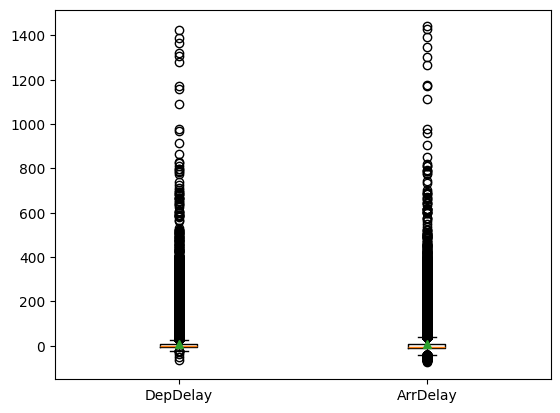

In [219]:
# Visualizing new distributions
plt.boxplot(
    x = df_flights[
        ['DepDelay', 'ArrDelay']
    ],
    showmeans = True
)
plt.xticks(
    [1, 2],
    labels = ['DepDelay', 'ArrDelay']
)
plt.show()

In [220]:
# DepDelay
df_flights = df_flights[
    (df_flights['DepDelay'] >= -50) &
    (df_flights['DepDelay'] <= 100)
]
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


In [221]:
# ArrDelay
df_flights = df_flights[
    (df_flights['ArrDelay'] >= -50) &
    (df_flights['ArrDelay'] <= 100)
]
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


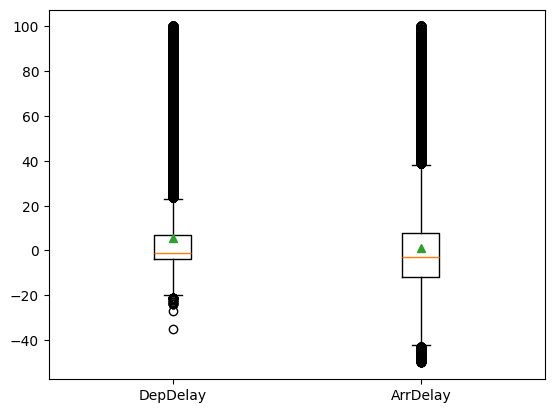

In [222]:
# Visualizing new distributions
plt.boxplot(
    x = df_flights[
        ['DepDelay', 'ArrDelay']
    ],
    showmeans = True
)
plt.xticks(
    [1, 2],
    labels = ['DepDelay', 'ArrDelay']
)
plt.show()

In [223]:
# Statistics for "DepDelay"
df_flights['DepDelay'].describe()

count    262864.000000
mean          5.411026
std          18.041591
min         -35.000000
25%          -4.000000
50%          -1.000000
75%           7.000000
max         100.000000
Name: DepDelay, dtype: float64

In [224]:
# Statistics for "DepDelay"
df_flights['ArrDelay'].describe()

count    262864.000000
mean          1.319264
std          21.339917
min         -50.000000
25%         -12.000000
50%          -3.000000
75%           8.000000
max         100.000000
Name: ArrDelay, dtype: float64

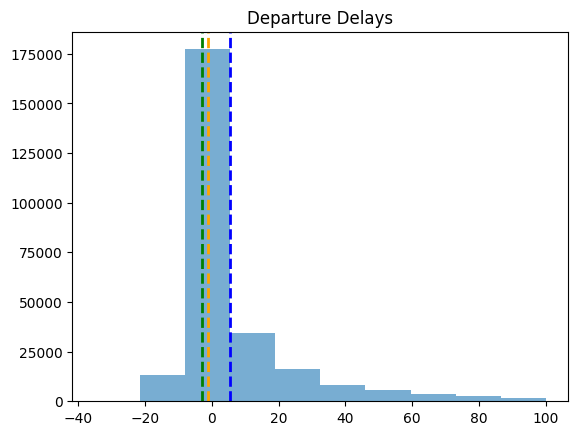

In [225]:
# Histogram for "DepDelay"
plt.hist(
    df_flights['DepDelay'],
    alpha = 0.6
)
# Mean
plt.axvline(
    df_flights['DepDelay'].mean(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)
# Median
plt.axvline(
    df_flights['DepDelay'].median(),
    color = 'orange',
    linestyle = 'dashed',
    linewidth = 2
)
# Mode
plt.axvline(
    df_flights['DepDelay'].mode()[0],
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)
plt.title('Departure Delays')
plt.show()

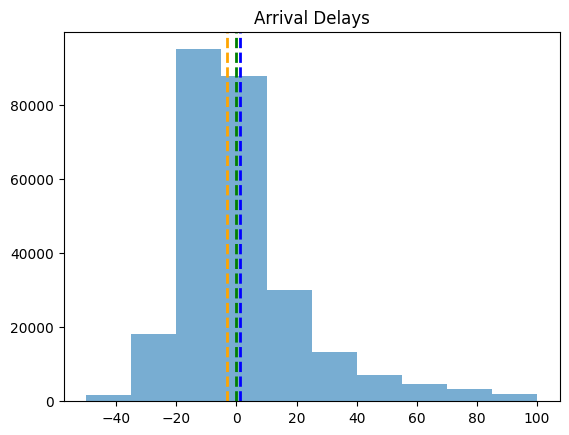

In [226]:
# Histogram for "ArrDelay"
plt.hist(
    df_flights['ArrDelay'],
    alpha = 0.6
)
# Mean
plt.axvline(
    df_flights['ArrDelay'].mean(),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)
# Median
plt.axvline(
    df_flights['ArrDelay'].median(),
    color = 'orange',
    linestyle = 'dashed',
    linewidth = 2
)
# Mode
plt.axvline(
    df_flights['ArrDelay'].mode()[0],
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)
plt.title('Arrival Delays')
plt.show()

# Data exploration

## Statistics for numeric fields

In [227]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,262864.0,262864.000000,262864.000000,262864.000000,262864.000000,262864.000000,262864.000000,262864.000000,262864.000000,262864.000000,262864.000000,262864.000000,262864.000000
mean,2013.0,6.993670,15.808266,3.902200,12747.680766,12739.421408,1317.896414,5.411026,0.172165,1498.475527,1.319264,0.189311,0.011006
std,0.0,1.988791,8.812949,1.989836,1502.992910,1503.552848,470.663076,18.041591,0.377525,491.931739,21.339917,0.391756,0.104329
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-35.000000,0.000000,1.000000,-50.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,915.000000,-4.000000,0.000000,1115.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1311.000000,-1.000000,0.000000,1520.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1717.000000,7.000000,0.000000,1914.000000,8.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,100.000000,1.000000,2359.000000,100.000000,1.000000,1.000000


## Arrival delay by carrier

In [228]:
# Table
delay_by_carrier = df_flights.groupby('Carrier')[['ArrDelay']].mean()
delay_by_carrier

,ArrDelay
Carrier,
9E,-1.342614
AA,0.918217
AS,-1.699253
B6,1.977220
DL,-2.017554
EV,1.643209
F9,6.411799
FL,2.381105
HA,-1.633674


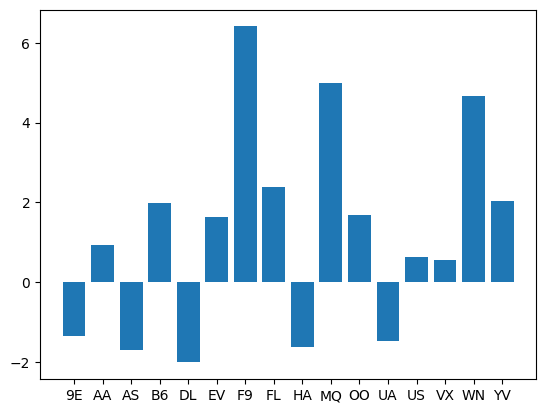

In [229]:
# Graphic
plt.bar(
    delay_by_carrier.index,
    delay_by_carrier['ArrDelay']
)
plt.show()

## Arrival delays by day of week

### Sum

In [230]:
# Table
arrDelays_byDaysOfWeek_sum = df_flights.groupby('DayOfWeek')[['ArrDelay']].sum()
arrDelays_byDaysOfWeek_sum

,ArrDelay
DayOfWeek,
1,61192
2,-2236
3,54814
4,150137
5,109698
6,-39287
7,12469


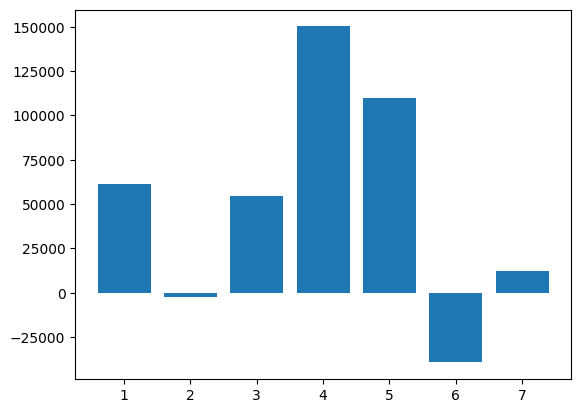

In [231]:
# Graph
plt.bar(
    arrDelays_byDaysOfWeek_sum.index,
    arrDelays_byDaysOfWeek_sum['ArrDelay']
)
plt.show()

### Mean

In [232]:
# Table
arrDelays_byDaysOfWeek_mean = df_flights.groupby('DayOfWeek')[['ArrDelay']].mean()
arrDelays_byDaysOfWeek_mean

,ArrDelay
DayOfWeek,
1,1.544161
2,-0.057500
3,1.393305
4,3.860853
5,2.847967
6,-1.265853
7,0.340991


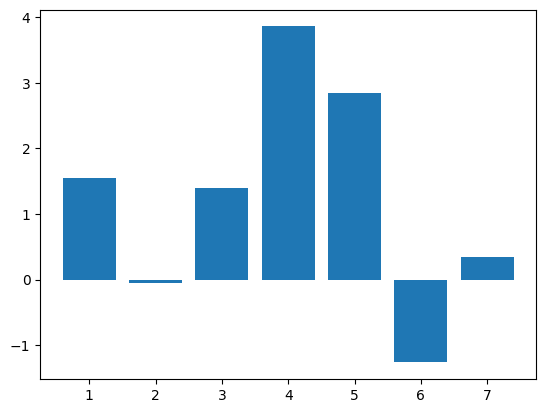

In [233]:
# Graph
plt.bar(
    arrDelays_byDaysOfWeek_mean.index,
    arrDelays_byDaysOfWeek_mean['ArrDelay']
)
plt.show()

### Boxplot by day of week

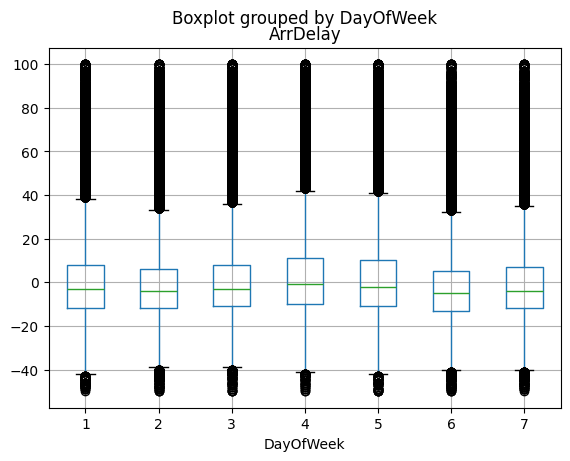

In [234]:
df_flights.boxplot(
    'ArrDelay',
    'DayOfWeek'
)
plt.show()

## Departure delay by airport

In [235]:
# Table
depDelays_byAirport = df_flights.groupby('OriginAirportName')[['DepDelay']].mean()
depDelays_byAirport = depDelays_byAirport.sort_values(
    by = 'DepDelay',
    ascending = False
)
depDelays_byAirport

,DepDelay
OriginAirportName,
Chicago Midway International,11.755094
William P Hobby,9.423628
Denver International,8.842562
Dallas Love Field,8.829622
Dallas/Fort Worth International,8.685711
...,...
Honolulu International,1.008178
Tucson International,0.624885
Long Beach Airport,0.202454


In [236]:
depDelays_byAirport[depDelays_byAirport['DepDelay'] == depDelays_byAirport['DepDelay'].max()]

,DepDelay
OriginAirportName,
Chicago Midway International,11.755094


## Late departures and late arrivals

In [237]:
arrDelays_byDepDeplay = df_flights.groupby('DepDel15')[['ArrDelay']].mean()
arrDelays_byDepDeplay

,ArrDelay
DepDel15,
0.0,-5.352510
1.0,33.399682


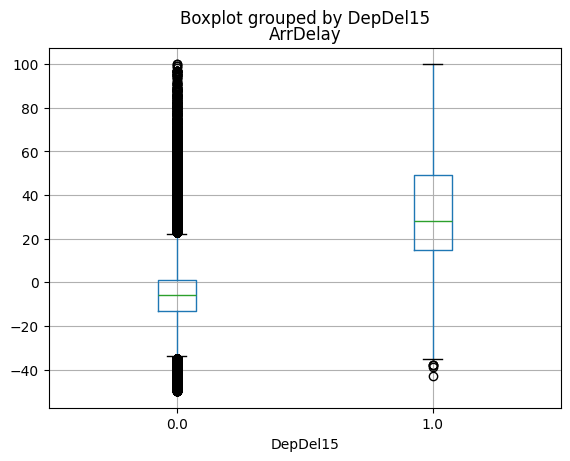

In [238]:
df_flights.boxplot(
    'ArrDelay',
    'DepDel15'
)
plt.show()

## Late arrivals by route

In [242]:
arrDelay_byRoute = df_flights.groupby(
    ['OriginAirportName', 'DestAirportName']
)[['ArrDel15']].sum()
arrDelay_byRoute = arrDelay_byRoute.sort_values(
    'ArrDel15',
    ascending = False
)
arrDelay_byRoute

,,ArrDel15
OriginAirportName,DestAirportName,
Los Angeles International,San Francisco International,252
San Francisco International,Los Angeles International,234
LaGuardia,Hartsfield-Jackson Atlanta International,158
McCarran International,San Francisco International,143
Los Angeles International,McCarran International,139
...,...,...
Ted Stevens Anchorage International,Salt Lake City International,0
LaGuardia,Indianapolis International,0
Cincinnati/Northern Kentucky International,Southwest Florida International,0


## Average arrival delay by route

In [243]:
arrDelay_byRoute_mean = df_flights.groupby(
    ['OriginAirportName', 'DestAirportName']
)[['ArrDelay']].mean()
arrDelay_byRoute_mean = arrDelay_byRoute_mean.sort_values(
    'ArrDelay',
    ascending = False
)
arrDelay_byRoute_mean

,,ArrDelay
OriginAirportName,DestAirportName,
Pittsburgh International,Raleigh-Durham International,63.000000
Southwest Florida International,Theodore Francis Green State,44.000000
Minneapolis-St Paul International,Richmond International,31.400000
Cleveland-Hopkins International,Philadelphia International,28.500000
Louis Armstrong New Orleans International,Ronald Reagan Washington National,25.333333
...,...,...
Bradley International,Los Angeles International,-20.600000
Eppley Airfield,LaGuardia,-22.200000
Jacksonville International,Chicago Midway International,-22.727273
